In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set aof random latitutudes and longitudes.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [6]:
# Basic URL for the OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + "Boston"


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | uhingen
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | grand gaube
Processing Record 15 of Set 1 | calabozo
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | caravelas
Processing Record 19 of Set 1 | gwadar
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | lashi

Processing Record 39 of Set 4 | punta arenas
Processing Record 40 of Set 4 | pemangkat
Processing Record 41 of Set 4 | vestmannaeyjar
Processing Record 42 of Set 4 | pedasi
Processing Record 43 of Set 4 | la palma
Processing Record 44 of Set 4 | teguldet
Processing Record 45 of Set 4 | sorong
Processing Record 46 of Set 4 | kaoma
Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | vao
Processing Record 50 of Set 4 | paamiut
Processing Record 1 of Set 5 | yumen
Processing Record 2 of Set 5 | santa isabel do rio negro
Processing Record 3 of Set 5 | camocim
Processing Record 4 of Set 5 | guatire
Processing Record 5 of Set 5 | hokitika
Processing Record 6 of Set 5 | bambanglipuro
Processing Record 7 of Set 5 | saint-pierre
Processing Record 8 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 10 of Set 5 | fethiye
Processing Record 11 o

Processing Record 26 of Set 8 | kibaya
Processing Record 27 of Set 8 | rundu
Processing Record 28 of Set 8 | hami
Processing Record 29 of Set 8 | thunder bay
Processing Record 30 of Set 8 | likasi
Processing Record 31 of Set 8 | ekhabi
Processing Record 32 of Set 8 | fowa
Processing Record 33 of Set 8 | stryn
Processing Record 34 of Set 8 | silver city
Processing Record 35 of Set 8 | puerto colombia
Processing Record 36 of Set 8 | sakaraha
Processing Record 37 of Set 8 | kyra
Processing Record 38 of Set 8 | doha
Processing Record 39 of Set 8 | pangnirtung
Processing Record 40 of Set 8 | doume
Processing Record 41 of Set 8 | salisbury
Processing Record 42 of Set 8 | binzhou
Processing Record 43 of Set 8 | marabba
Processing Record 44 of Set 8 | kasaoka
Processing Record 45 of Set 8 | itarema
Processing Record 46 of Set 8 | lengshuijiang
Processing Record 47 of Set 8 | fairbanks
Processing Record 48 of Set 8 | buzmeyin
Processing Record 49 of Set 8 | severnoye
Processing Record 50 of Set

Processing Record 11 of Set 12 | lebedyn
Processing Record 12 of Set 12 | broome
Processing Record 13 of Set 12 | sisimiut
Processing Record 14 of Set 12 | bud
Processing Record 15 of Set 12 | rantepao
Processing Record 16 of Set 12 | malanje
Processing Record 17 of Set 12 | moerai
Processing Record 18 of Set 12 | tingi
Processing Record 19 of Set 12 | rio grande
Processing Record 20 of Set 12 | victoria point
Processing Record 21 of Set 12 | wairoa
Processing Record 22 of Set 12 | fatwa
Processing Record 23 of Set 12 | zholymbet
Processing Record 24 of Set 12 | shilong
Processing Record 25 of Set 12 | faya
Processing Record 26 of Set 12 | oksfjord
Processing Record 27 of Set 12 | atambua
Processing Record 28 of Set 12 | yatou
Processing Record 29 of Set 12 | pangody
Processing Record 30 of Set 12 | mergui
City not found. Skipping...
Processing Record 31 of Set 12 | seydi
Processing Record 32 of Set 12 | rabo de peixe
Processing Record 33 of Set 12 | faanui
Processing Record 34 of Set 

In [9]:
len(city_data)

533

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.74,-97.86,17.60,85,90,11.41,CA,2020-10-31 06:31:53
1,Mahebourg,-20.41,57.70,71.60,53,20,12.75,MU,2020-10-31 06:32:35
2,Chokurdakh,70.63,147.92,9.28,96,99,6.13,RU,2020-10-31 06:32:11
3,Sao Filipe,14.90,-24.50,79.43,65,100,16.55,CV,2020-10-31 06:33:07
4,Ushuaia,-54.80,-68.30,48.20,70,75,18.34,AR,2020-10-31 06:31:23
5,Vaini,-21.20,-175.20,73.40,83,75,10.29,TO,2020-10-31 06:32:19
6,Avarua,-21.21,-159.78,73.40,83,100,14.99,CK,2020-10-31 06:32:25
7,Bethel,41.37,-73.41,30.00,92,1,6.24,US,2020-10-31 06:31:52
8,Uhingen,48.70,9.59,46.99,84,100,3.60,DE,2020-10-31 06:34:32
9,Saskylakh,71.92,114.08,-2.54,84,0,5.41,RU,2020-10-31 06:32:10


In [11]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]



In [12]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2020-10-31 06:31:53,55.74,-97.86,17.60,85,90,11.41
1,Mahebourg,MU,2020-10-31 06:32:35,-20.41,57.70,71.60,53,20,12.75
2,Chokurdakh,RU,2020-10-31 06:32:11,70.63,147.92,9.28,96,99,6.13
3,Sao Filipe,CV,2020-10-31 06:33:07,14.90,-24.50,79.43,65,100,16.55
4,Ushuaia,AR,2020-10-31 06:31:23,-54.80,-68.30,48.20,70,75,18.34
...,...,...,...,...,...,...,...,...,...
528,Seydi,TM,2020-10-31 06:36:38,39.48,62.91,63.57,25,0,1.52
529,Rabo De Peixe,PT,2020-10-31 06:36:39,37.80,-25.58,69.80,94,75,12.75
530,Faanui,PF,2020-10-31 06:32:13,-16.48,-151.75,79.00,76,0,15.77
531,Tshikapa,CD,2020-10-31 06:36:39,-6.42,20.80,80.08,76,26,1.41


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604126232.8111985

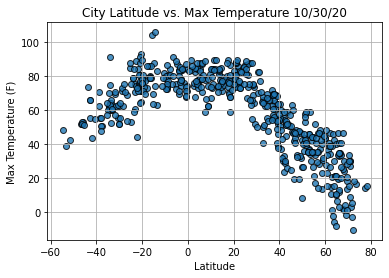

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

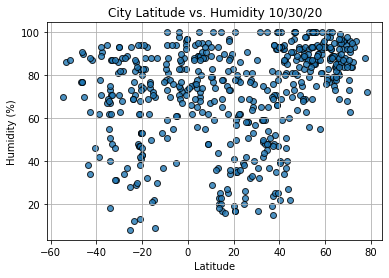

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

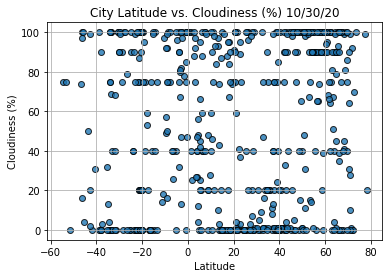

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

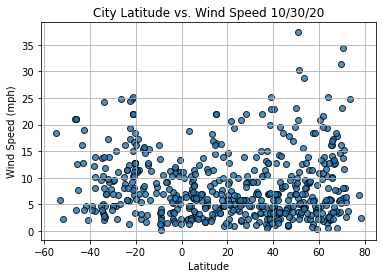

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [38]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
#How to build new dataframe
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2020-10-31 06:31:59
Lat                        -23.12
Lng                       -134.97
Max Temp                    75.58
Humidity                       71
Cloudiness                      0
Wind Speed                   5.66
Name: 13, dtype: object

In [40]:
# where Lat is 0 or greater
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2020-10-31 06:31:53,55.74,-97.86,17.60,85,90,11.41
2,Chokurdakh,RU,2020-10-31 06:32:11,70.63,147.92,9.28,96,99,6.13
3,Sao Filipe,CV,2020-10-31 06:33:07,14.90,-24.50,79.43,65,100,16.55
7,Bethel,US,2020-10-31 06:31:52,41.37,-73.41,30.00,92,1,6.24
8,Uhingen,DE,2020-10-31 06:34:32,48.70,9.59,46.99,84,100,3.60


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

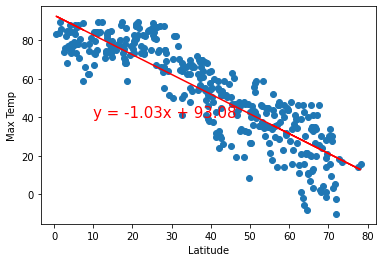

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

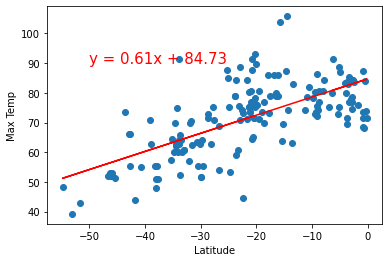

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

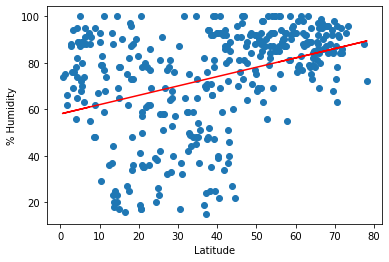

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

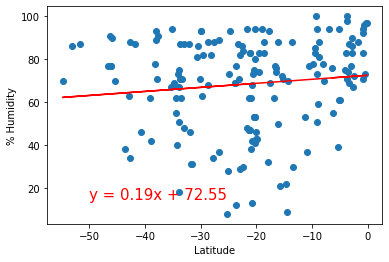

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

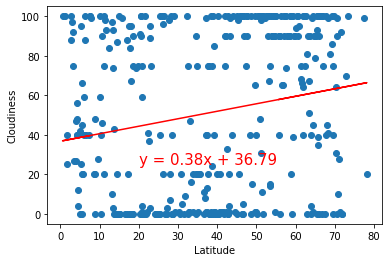

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 'Cloudiness',(20,25))

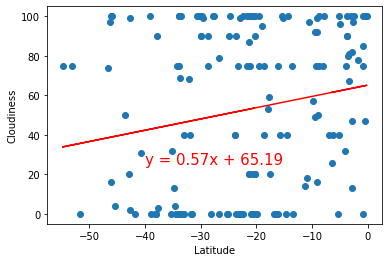

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 'Cloudiness',(-40,25))

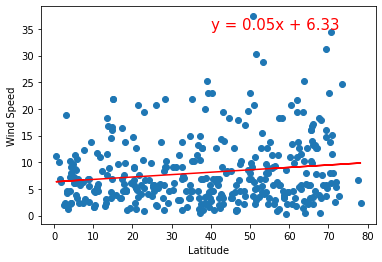

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

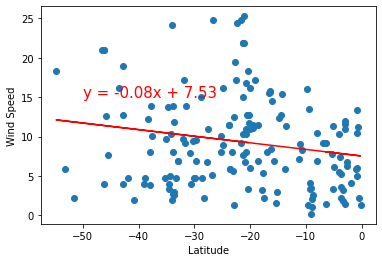

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,15))